# **BOILER PLATE CODE (COMMON TEMPLATE)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Useful for image tasks, especially with directories
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preprocessing ---

# For loading datasets locally, refer to 'Loading Datasets locally.docx':
# - MNIST: `with np.load('mnist.npz') as data:`
# - Faster R-CNN weights: `model.load_state_dict(torch.load('fasterrcnn_weights.pth'))`
# - ResNet weights: `resnet_weights_path = "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"`
# - VGG16 weights: `weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'`
# - CIFAR-10: `with np.load('/mnt/data/cifar10.npz') as data:`

# --- 2. Model Definition ---
# This structure changes significantly based on the experiment (CNN, ResNet, Transfer Learning, R-CNN, Semantic Segmentation)
# Here's a general CNN example (common in Experiment 4, 5, 6):
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation=',lllll..............softmax') # Example for classification
    ])
    return model

# For ResNet (Experiment 7), Transfer Learning (Experiment 8), R-CNN (Experiment 9), Semantic Segmentation (Experiment 10),
# the model architecture will be more complex and specific to the task.
# You would use pre-trained models or specialized layers.

# Example for Transfer Learning (VGG16 in Experiment 8):
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
# model = models.Sequential([
#     base_model,
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax')
# ])

# --- 3. Model Compilation ---
def compile_model(model, optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']):
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    model.summary()
    return model

# --- 4. Model Training ---
def train_model(model, x_train, y_train, epochs=10, batch_size=32, validation_data=None):
    # If using ImageDataGenerator, use model.fit(train_data, validation_data=validation_data, epochs=epochs)
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
    return history

# --- 5. Model Evaluation ---
def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"\nTest accuracy: {test_acc:.4f}")
    return test_loss, test_acc

# --- 6. Visualization ---
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')
    plt.show()

# **EXPERIMENT-4 CNN for Multi-Category JPG Image Classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

# CIFAR-10 class labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define paths for training and validation data (Ensure images are organized in subfolders by category)
train_dir = "data/train"
val_dir = "data/val"

# Data augmentation to improve generalization
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values (0-1 range)
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of images as validation set
)

# Load training and validation data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(len(labels), activation='softmax')  # Multi-category classification
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Function to predict labels for new images
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # Resize to match model input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  # Get highest probability class

    print(f"Predicted class: {labels[predicted_class]}")

# Example: Predict label for a new JPG image
predict_image("data/test/sample.jpg")


# **EXPERIMENT-5: Complete CIFAR-10 CNN with Performance Analysis (OVERFITTING/UNDERFITTING/PERFECT FIT)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset (offline method or direct TensorFlow loading)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images (scale pixel values between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define CNN model with dropout and L2 regularization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(10, activation='softmax')  # 10 output categories
])

model.summary()

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation to improve generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(X_train)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=20, validation_data=(X_test, y_test))

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot accuracy and loss trends
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Check for Overfitting or Underfitting
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

if train_acc > 0.90 and val_acc < 0.75:
    print("The model is overfitting. Apply regularization techniques.")
elif train_acc < 0.70 and val_acc < 0.70:
    print("The model is underfitting. Consider increasing complexity.")
else:
    print("The model is a good fit!")


# **EXPERIMENT-1: Design Single unit perceptron for classification of iris datasetwithout using predefined models.**

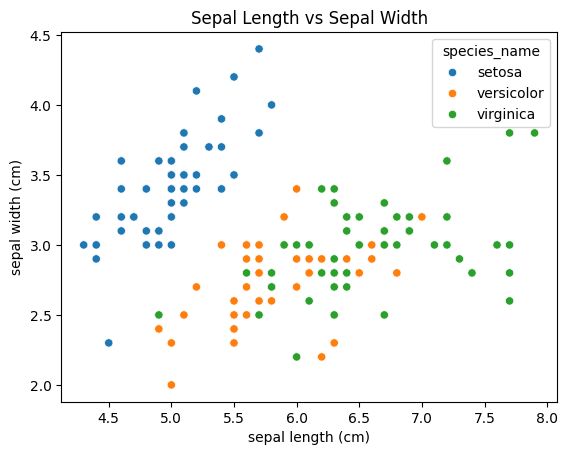

[np.str_('setosa') np.str_('versicolor') np.str_('virginica')]
species_name
setosa        50
versicolor    50
virginica     50
dtype: int64
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3494 - loss: 5.3776 - val_accuracy: 0.3333 - val_loss: 5.4640
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3614 - loss: 5.2262 - val_accuracy: 0.3333 - val_loss: 5.2105
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3664 - loss: 4.9157 - val_accuracy: 0.3333 - val_loss: 4.9509
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3477 - loss: 4.8246 - val_accuracy: 0.3333 - val_loss: 4.6973
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3154 - loss: 4.7704 - val_accuracy: 0.3333 - val_loss: 4.4426
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2988 - loss: 4.6112 - val_accuracy: 0.3333 - val_loss: 4.1934
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3119 - loss: 4.3535 - val_accuracy: 0.3333 - val_loss: 3.9534
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2796 - loss: 4.1225 - val_accuracy: 0.3333 - val_loss: 3.7124
Ep

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numerical species labels to names for display
species_names = {i: name for i, name in enumerate(iris.target_names)}
iris_df['species_name'] = iris_df['species'].map(species_names)


# Scatter plot visualization
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_name', data=iris_df)
plt.title("Sepal Length vs Sepal Width")
plt.show()

# Display unique species and their counts with names
print(iris_df['species_name'].unique())
print(iris_df.groupby('species_name').size())

# Prepare dataset for training (using original numerical labels for training)
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# Convert labels to one-hot encoding
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()  # Convert to dense array

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a single perceptron model
model = keras.Sequential([
    Dense(3, activation='softmax', input_shape=(4,))  # 3 output classes (Setosa, Versicolor, Virginica)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the perceptron
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# **EXPERIMENT-2: Design, train and test the MLP for tabular data and verify various activation functions and optimizers tensorflow. bold text**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

Activation: relu, Optimizer: adam, MSE: 26012.0898


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regul

Activation: relu, Optimizer: sgd, MSE: 3379.7559


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: relu, Optimizer: rmsprop, MSE: 26166.5977


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

Activation: relu, Optimizer: adagrad, MSE: 26421.0059


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: tanh, Optimizer: adam, MSE: 26167.0625


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Activation: tanh, Optimizer: sgd, MSE: 3050.1594


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.

Activation: tanh, Optimizer: rmsprop, MSE: 26209.2480


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: tanh, Optimizer: adagrad, MSE: 26364.9277


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: sigmoid, Optimizer: adam, MSE: 26181.2754


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: sigmoid, Optimizer: sgd, MSE: 4666.0444


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: sigmoid, Optimizer: rmsprop, MSE: 26002.8770


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Activation: sigmoid, Optimizer: adagrad, MSE: 26565.9121


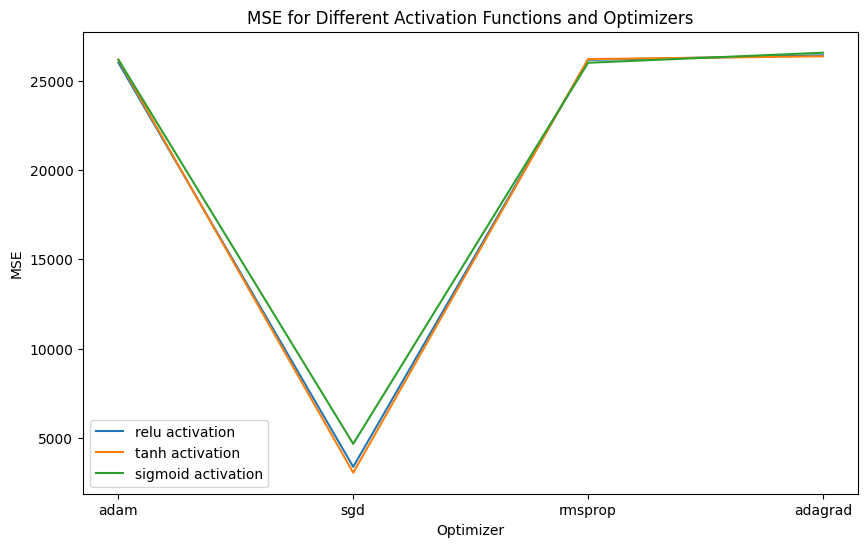

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and prepare the data
data = load_diabetes()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with configurable activation functions & optimizers
def create_model(activation='relu', optimizer='adam', use_batch_norm=False):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation=activation))
    if use_batch_norm:
        model.add(BatchNormalization())  # Add Batch Normalization

    model.add(Dense(32, activation=activation))
    if use_batch_norm:
        model.add(BatchNormalization())  # Add Batch Normalization

    model.add(Dense(1))  # No activation for regression output

    # Compile the model with gradient clipping for SGD optimizer
    optimizer_instance = tf.keras.optimizers.get(optimizer)
    if isinstance(optimizer_instance, SGD):
        optimizer_instance.learning_rate = 0.0001  # Reduced learning rate for SGD

    model.compile(optimizer=optimizer_instance, loss='mean_squared_error', metrics=['mse'])
    return model

# Define a list of activation functions and optimizers to test
activation_functions = ['relu', 'tanh', 'sigmoid']
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']
results = {}

# Train and test the model with different configurations
for activation in activation_functions:
    for optimizer in optimizers:
        model = create_model(activation=activation, optimizer=optimizer, use_batch_norm=True)
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Evaluate the model
        loss, mse = model.evaluate(X_test, y_test, verbose=0)
        results[(activation, optimizer)] = mse
        print(f"Activation: {activation}, Optimizer: {optimizer}, MSE: {mse:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
for activation in activation_functions:
    plt.plot([optimizer for (act, optimizer) in results.keys() if act == activation],
             [results[(activation, optimizer)] for optimizer in optimizers],
             label=f'{activation} activation')

plt.title('MSE for Different Activation Functions and Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('MSE')

# Option 1: Manually set the y-axis limits
# plt.ylim(0, 30000)  # Set lower and upper bounds for the y-axis

# Option 2: Use a logarithmic scale for the y-axis
# plt.yscale('log')

plt.legend()
plt.show()


# **EXPERIMENT-8: TRANSFER LEARNING**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Load pre-trained VGG16 model without the top classifier
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze pre-trained model layers to prevent retraining
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

# Compile the model with a small learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print model summaries
base_model.summary()
model.summary()


Epoch 1/10
180/391 ━━━━━━━━━━━━━━━━━━━━ 3:23 966ms/step - accuracy: 0.1464 - loss: 2.3336

KeyboardInterrupt: 